In [1]:
import numpy as np
import pandas as pd
import math
import itertools
import scipy.stats.stats 

from sklearn.model_selection import TimeSeriesSplit

from sklearn.feature_selection import mutual_info_classif
from sklearn.feature_selection import chi2
from sklearn.feature_selection import f_classif

from scipy.stats import norm

import matplotlib.pyplot as plt
from datetime import datetime

#Classification Models
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import Perceptron
from sklearn.tree import DecisionTreeClassifier
#Metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import make_scorer
import math
import matplotlib.dates as mdates
import seaborn as sns

/home/jho9/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [2]:
clf1 = LogisticRegression(solver = 'liblinear', random_state = 42)
clf2 = GaussianNB()
clf3 = RandomForestClassifier(n_estimators=100, random_state = 42)
clf4 = Perceptron(random_state = 42)
clf5 = LinearSVC(random_state = 42)
clf6 = KNeighborsClassifier()
clf7 = DecisionTreeClassifier(random_state = 42)

In [3]:
def seq_split(X_train, splits):
    #print(X_train.shape)
    list_of_tuple = range(0,X_train.shape[0],(math.ceil(X_train.shape[0]/splits)))
    for i in range(0, math.floor(len(list_of_tuple)/2), 2):
        print((list(list_of_tuple))[:i])

In [4]:
def get_param_grid(param_grid):
    keys, values = zip(*param_grid.items())
    experiments = [dict(zip(keys, v)) for v in itertools.product(*values)]
    #print("Number of combinations from the grid:", len(experiments))
    return experiments

In [5]:
"""
path = "C://Users//James//Documents//Econometrics Recession Code//"
rawdata = pd.read_csv(path + "macrodata_transform_corrected.csv", index_col="Unnamed: 0")
rawdata = rawdata.reset_index().drop('index', axis = 1)
rawdata2 = pd.read_csv(path + "More Macro Data.csv")
rawdata2 = rawdata2.drop(0)
rawdata2 = rawdata2.drop('sasdate',axis = 1)
"""

'\npath = "C://Users//James//Documents//Econometrics Recession Code//"\nrawdata = pd.read_csv(path + "macrodata_transform_corrected.csv", index_col="Unnamed: 0")\nrawdata = rawdata.reset_index().drop(\'index\', axis = 1)\nrawdata2 = pd.read_csv(path + "More Macro Data.csv")\nrawdata2 = rawdata2.drop(0)\nrawdata2 = rawdata2.drop(\'sasdate\',axis = 1)\n'

In [6]:
rawdata = pd.read_csv('Working_rawdata_needs_cleaning_csv_ver.csv')
df = rawdata.copy().drop('sasdate', axis = 1).drop([0,1], axis = 0)
df = df.drop('Recession', axis = 1)
dates = rawdata['sasdate'].drop([0,1], axis = 0)
y = pd.read_csv("macro_data.csv").drop(0, axis = 0).drop(['PAYEMS', 'T10YFFM', 'S.P.500', 'NAPMPI'], axis = 1).drop(1).drop('sasdate', axis = 1)
dates = dates[:698].reset_index().drop('index', axis = 1)[:687]
y = y.reset_index().drop('index', axis = 1)
y = y['rec_dates']
X = df.reset_index().drop('index', axis = 1)[:687]

In [7]:
dates = dates['sasdate']

In [8]:
dates = (dates).str.replace('/', '-', regex=True)

In [9]:
dates = dates.values

In [10]:
dates = pd.to_datetime(dates)

In [11]:
#sns.heatmap(X.isnull(), cbar=False)

In [12]:
X = X.drop((X.columns[(X.isna().any())]), axis = 1)

'\nax.xaxis.set_ticks(dates[range(0,dates.shape[0],36)])\nax.xaxis.set_tick_params(rotation = 45)\nax.xaxis.set_major_formatter(mdates.DateFormatter(\'%m-%y\'))\nax.set_title(\'Recessions in US\')\nax.set_xlabel("Dates")\nax.set_ylabel("Recession")\n'

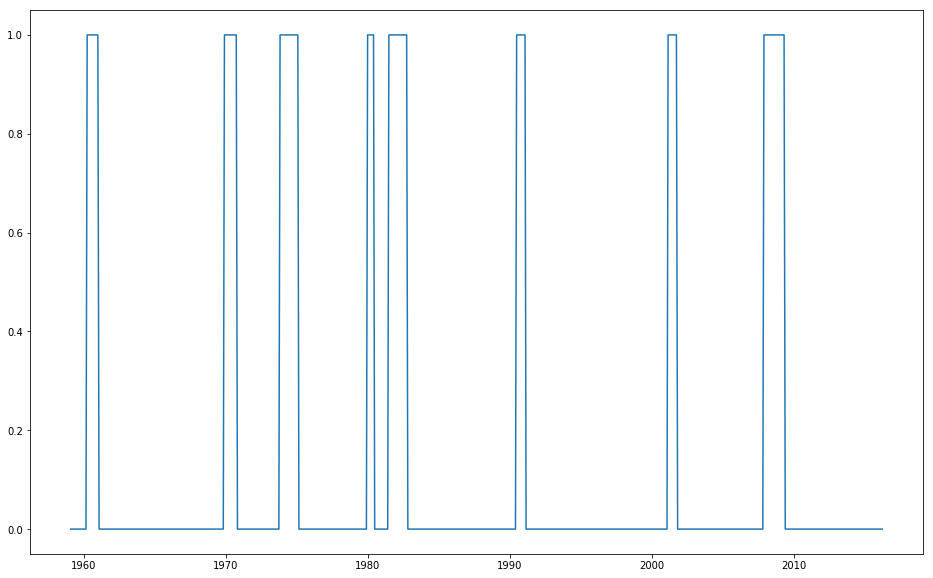

In [13]:
fig, ax = plt.subplots()
fig.set_figheight(10)
fig.set_figwidth(16)
ax.plot(dates, y)
"""
ax.xaxis.set_ticks(dates[range(0,dates.shape[0],36)])
ax.xaxis.set_tick_params(rotation = 45)
ax.xaxis.set_major_formatter(mdates.DateFormatter('%m-%y'))
ax.set_title('Recessions in US')
ax.set_xlabel("Dates")
ax.set_ylabel("Recession")
"""

In [14]:
#X all values not transformed
#y all values not transformed

In [15]:
lags = range(1,11) 
cols = X.columns
for i in lags:
    #print(i)
    for j in cols:
        #print(j)
        #print(X_train[j].shift(i))
        X[j + " lag "  + str(i)] = X[j].shift(i)

In [16]:
horizon = -3
y = y.shift(horizon)

In [17]:
X = X.dropna()
not_dropped = X.index
y = y.iloc[not_dropped]
y = y.dropna()
not_dropped_y = y.index
X = X.loc[not_dropped_y]


In [18]:
dates = dates[X.reset_index()['index'].values]

In [19]:
y = y.reset_index().drop('index',axis = 1)
X = X.reset_index().drop('index',axis = 1)

In [20]:
dates[:157]
cut = 300

In [21]:
y = y['rec_dates']

In [22]:
list_of_corr = []
for i in range(X.iloc[:cut].shape[1]):
    list_of_corr.append(scipy.stats.stats.pearsonr(X.iloc[:cut,i], y.iloc[:cut])[0])
#(pd.DataFrame(np.abs(list_of_corr)).sort_values(by = 0, ascending = False).head())
list_of_corr = np.array(list_of_corr)
list_of_corr = np.absolute(list_of_corr)
MI = mutual_info_classif(X.iloc[:cut], y.iloc[:cut] , random_state=42)
feature_score = pd.DataFrame(data = [list_of_corr, MI] ).T
feature_score.columns = ['Correlation', 'MI']
feature_score[['Corr_Rank', 'MI_Rank']] = feature_score.rank(ascending=False)
corr_ranking = feature_score.sort_values(by = 'Corr_Rank').index
MI_ranking = feature_score.sort_values(by = 'MI_Rank').index
feature_score['Corr_Rank + MI_Rank'] = (feature_score['Corr_Rank'] + feature_score['MI_Rank']/2)

In [23]:
corr_feats = X.columns[corr_ranking]
MI_feats = X.columns[MI_ranking]
combined_feats_imp = X.columns[feature_score.sort_values(by = "Corr_Rank + MI_Rank").index]

In [24]:
log_parameters = {'C':[0.001, 0.01, 0.1, 1.0]}

In [25]:
from sklearn.metrics import f1_score

In [26]:
from multiprocessing import Pool
from functools import partial

In [27]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

In [113]:
def test_clf(clf, X_train, y_train, scoring, splits, sampling, i):
    time_split = TimeSeriesSplit(n_splits = splits)
    clf.set_params(**i)
    X_train = np.array(X_train)
    y_train = np.array(y_train)
    result = []
    for train_index, test_index in time_split.split(X_train):
        X_split_train, X_split_test = X_train[train_index], X_train[test_index]
        y_split_train, y_split_test = y_train[train_index], y_train[test_index]
        if sampling == "SMOTE":
            if len(y_train[y_train == 1]) < len(y_train[y_train == 0]):
                #print("Check")
                X_res = X_split_train
                y_res = y_split_train
            else:
                #print("No Check")
                sm = SMOTE(random_state=42)
                X_res, y_res = sm.fit_sample(X_split_train, y_split_train)
        elif sampling == "RUS":
            rus = RandomUnderSampler(random_state=42)
            X_res, y_res = rus.fit_sample(X_split_train, y_split_train)
        else:
            X_res = X_split_train
            y_res = y_split_train
        #print(train_index)
        clf.fit(X_res, y_res)
        y_pred = clf.predict(X_split_test)
        result.extend(y_pred)
    train_start = (len(y_train) - len(result))
    #print(train_start)
    score = scoring(y_train[train_start:], result)
    return (score, i, X_train.shape[1])

In [114]:
def grid_search(param_grid, X_train, y_train, clf, splits, scoring, sampling, n_jobs):
    #Get parameters and output optimal based on kfold
    grid = get_param_grid(param_grid)
    score_list = []
    #print("Grid Size is: ", len(grid))
    p = Pool(n_jobs)
    #print(grid)
    #print(sampling)
    values = p.map(partial(test_clf,clf,X_train,y_train,scoring,splits,sampling), grid)
    p.close()
    p.join()
    return values
    #score_list.append((score,i,X_train.shape[1]))    
    #return ((score_list))
    

In [115]:
#pd.DataFrame(grid_search(log_parameters, (X.iloc[:cut][corr_feats[:1]]), y.iloc[:cut], clf1, 18, f1_score,sampling = "SMOTE", n_jobs = 2)).sort_values(by = 0, ascending = False).iloc[0,:]

In [116]:
def filtwrap(X,y,feats, parameters, clf, spilts, scoring, n_jobs,sampling="None"):
    list_of_acc = []
    for i in range(1,X.shape[1]+1,1):
        if i % 100 == 0:
            print(i)
        list_of_acc.append(pd.DataFrame(grid_search(parameters, (X.iloc[:cut][feats[:i]]), y.iloc[:cut], clf, spilts,  scoring,sampling, n_jobs = n_jobs)).sort_values(by = 0, ascending = False).iloc[0,:].values)
    return list_of_acc

In [ ]:
filtwrap((X.iloc[:cut]), y.iloc[:cut], combined_feats_imp, log_parameters, clf1, 18, scoring= roc_auc_score, sampling = "SMOTE", n_jobs = 4)

100
200
300
400
500
600
700


In [267]:
def forward_wrapper(X_train,y_train, clf, splits,scoring, sampling):
    train_start = (math.ceil((((X_train.shape[0]/splits)-int(X_train.shape[0]/splits)))*splits))
    time_split = TimeSeriesSplit(n_splits = splits)
    features = list(X_train.columns)
    best_feat = []
    best_score = -1
    new_score = -0.5
    count = 0
    while new_score > best_score:
        print("Count:", count)
        print("Current Best Score: ", best_score)
        best_score = new_score
        #print("These are features")
        for i in features:
            #print(i)
            result = []
            for train_index, test_index in time_split.split(X_train):
                X_split_train, X_split_test = X_train.loc[:,best_feat + [i]].iloc[train_index, :], X_train.loc[:,best_feat +[i]].iloc[test_index, :]
                y_split_train, y_split_test = y_train.iloc[train_index], y_train.iloc[test_index]
                if sampling == "SMOTE":
                    if len(y_train[y_train == 1]) < len(y_train[y_train == 0]):
                        #print("Check")
                        X_res = X_split_train
                        y_res = y_split_train
                    else:
                        #print("No Check")
                        sm = SMOTE(random_state=42)
                        X_res, y_res = sm.fit_sample(X_split_train, y_split_train)
                #print(X_split_train)
                #print(y_split_train)
                clf.fit(X_res,y_res)
                y_pred = clf.predict(X_split_test)
                result.extend(y_pred)
            score = scoring(y_train[train_start:], result)
            if score > new_score:
                new_score = score
        if best_score == new_score:
            print("NO Change")
            break
        index = i
        best_feat.append(index)
        print("This is feature")
        print(index)
        print("New Score")
        print(new_score)
        features.remove(index)
    return best_feat

In [268]:
forward_wrapper(X_train, y_train, clf2, 18, roc_auc_score, sampling = "SMOTE")

Count: 0
Current Best Score:  -1
This is feature
INVEST lag 10
New Score
0.9056732740943266
Count: 0
Current Best Score:  -0.5
NO Change


['INVEST lag 10']

In [33]:
X_train = X[:cut]
y_train = y[:cut]

In [34]:
results_rank_mix = filtwrap(X_train,y_train,combined_feats_imp,log_parameters, clf1, 18, f1_score, 4, "SMOTE")

/home/jho9/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/jho9/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/jho9/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/jho9/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/jho9/anaconda3/lib/python3.6/site-packages/sklearn/metrics/cla

KeyboardInterrupt: 

In [86]:
pd.DataFrameFrame(results_rank_mix).head()

,0,1,2
0,0.689655,{'C': 0.001},1
1,0.733333,{'C': 0.001},2
2,0.733333,{'C': 0.001},3
3,0.733333,{'C': 0.001},4
4,0.125000,{'C': 1.0},5


In [ ]:
results_corr = filtwrap(X_train,y_train,corr_feats,log_parameters, clf1, 18, f1_score, 4, "SMOTE")

In [ ]:
results_MI = filtwrap(X_train,y_train,MI_feats,log_parameters, clf1, 18, f1_score, 4, "SMOTE")

In [83]:
results_rank_mix_RS = filtwrap(X_train,y_train,combined_feats_imp,log_parameters, clf1, 18, f1_score, n_jobs = 4, sampling="RUS")

100


Process ForkPoolWorker-10394:
Process ForkPoolWorker-10393:
Process ForkPoolWorker-10395:
Traceback (most recent call last):
  File "/home/jho9/anaconda3/lib/python3.6/multiprocessing/process.py", line 258, in _bootstrap
    self.run()
Traceback (most recent call last):
Process ForkPoolWorker-10396:
  File "/home/jho9/anaconda3/lib/python3.6/multiprocessing/process.py", line 93, in run
    self._target(*self._args, **self._kwargs)
Traceback (most recent call last):
Traceback (most recent call last):
  File "/home/jho9/anaconda3/lib/python3.6/multiprocessing/pool.py", line 108, in worker
    task = get()
  File "/home/jho9/anaconda3/lib/python3.6/multiprocessing/process.py", line 258, in _bootstrap
    self.run()
  File "/home/jho9/anaconda3/lib/python3.6/multiprocessing/process.py", line 258, in _bootstrap
    self.run()
  File "/home/jho9/anaconda3/lib/python3.6/multiprocessing/process.py", line 93, in run
    self._target(*self._args, **self._kwargs)
  File "/home/jho9/anaconda3/lib/

KeyboardInterrupt: 

  File "/home/jho9/anaconda3/lib/python3.6/multiprocessing/connection.py", line 379, in _recv
    chunk = read(handle, remaining)
KeyboardInterrupt


In [81]:
pd.DataFrame(results_rank_mix_RS).head()

,0,1,2
0,0.733333,{'C': 0.001},1
1,0.687500,{'C': 0.001},2
2,0.846154,{'C': 0.001},3
3,0.733333,{'C': 0.001},4
4,0.275000,{'C': 1.0},5


In [82]:
results_corr_RS = filtwrap(X_train,y_train,corr_feats,log_parameters, clf1, 18, f1_score, n_jobs=4, sampling = "RUS")
results_MI_RS = filtwrap(X_train,y_train,MI_feats,log_parameters, clf1, 18, f1_score, n_jobs=4, sampling = "RUS")

100


Process ForkPoolWorker-9943:
Process ForkPoolWorker-9942:
Process ForkPoolWorker-9944:
Traceback (most recent call last):
  File "/home/jho9/anaconda3/lib/python3.6/multiprocessing/process.py", line 258, in _bootstrap
    self.run()
  File "/home/jho9/anaconda3/lib/python3.6/multiprocessing/process.py", line 93, in run
    self._target(*self._args, **self._kwargs)
  File "/home/jho9/anaconda3/lib/python3.6/multiprocessing/pool.py", line 119, in worker
    result = (True, func(*args, **kwds))
  File "/home/jho9/anaconda3/lib/python3.6/multiprocessing/pool.py", line 44, in mapstar
    return list(map(*args))
Traceback (most recent call last):
  File "/home/jho9/anaconda3/lib/python3.6/multiprocessing/process.py", line 258, in _bootstrap
    self.run()
  File "<ipython-input-63-e7c04aae1c85>", line 21, in test_clf
    X_res, y_res = rus.fit_sample(X_split_train, y_split_train)
Process ForkPoolWorker-9941:
  File "/home/jho9/anaconda3/lib/python3.6/site-packages/imblearn/base.py", line 88,

KeyboardInterrupt: 

  File "/home/jho9/anaconda3/lib/python3.6/pickle.py", line 476, in save
    f(self, obj) # Call unbound method with explicit self
  File "/home/jho9/anaconda3/lib/python3.6/site-packages/imblearn/base.py", line 159, in fit
    self.X_hash_, self.y_hash_ = hash_X_y(X, y)
  File "/home/jho9/anaconda3/lib/python3.6/site-packages/imblearn/base.py", line 88, in fit_sample
    return self.fit(X, y).sample(X, y)
  File "/home/jho9/anaconda3/lib/python3.6/multiprocessing/pool.py", line 119, in worker
    result = (True, func(*args, **kwds))
  File "/home/jho9/anaconda3/lib/python3.6/site-packages/imblearn/utils/validation.py", line 100, in hash_X_y
    raw_idx = rng.randint(X.shape[0], size=n_samples)
  File "/home/jho9/anaconda3/lib/python3.6/multiprocessing/pool.py", line 44, in mapstar
    return list(map(*args))
  File "<ipython-input-63-e7c04aae1c85>", line 26, in test_clf
    clf.fit(X_res, y_res)
KeyboardInterrupt
  File "/home/jho9/anaconda3/lib/python3.6/site-packages/imblearn/base.p

In [74]:
#pd.DataFrame(results_rank_mix)

In [91]:
pd.DataFrame(results_rank_mix)[0].head()

0    0.689655
1    0.733333
2    0.733333
3    0.733333
4    0.125000
Name: 0, dtype: float64

In [92]:
pd.DataFrame(results_corr)[0].head()

0    0.689655
1    0.333333
2    0.387097
3    0.451613
4    0.148148
Name: 0, dtype: float64

In [93]:
pd.DataFrame(results_MI)[0].head()

0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: 0, dtype: float64

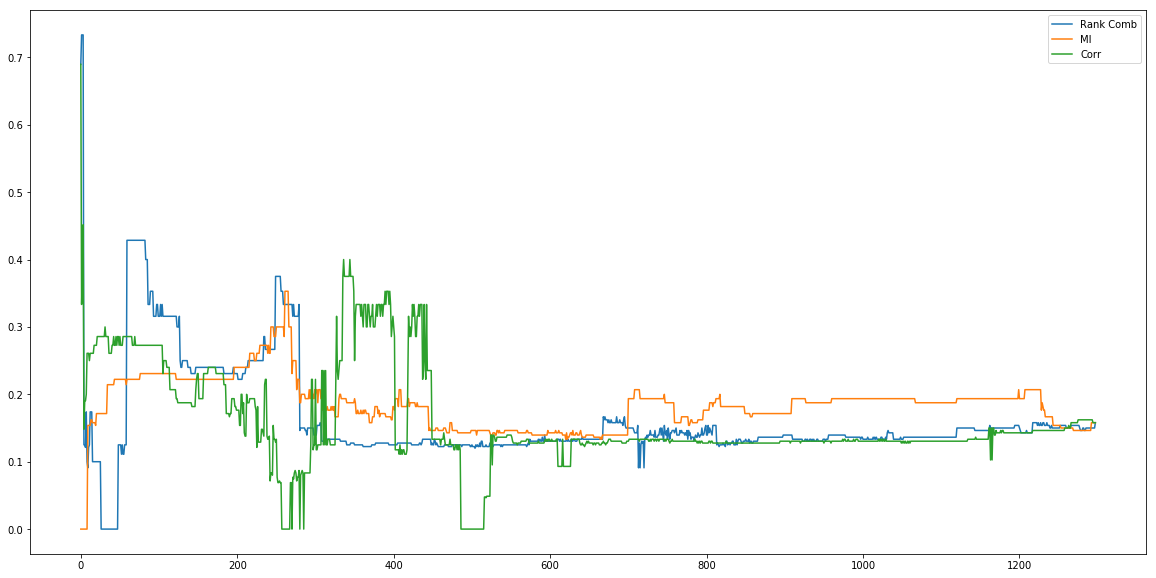

In [90]:
plt.figure(figsize=(20, 10))
plt.plot(pd.DataFrame(results_rank_mix)[0])
plt.plot(pd.DataFrame(results_MI)[0])
plt.plot(pd.DataFrame(results_corr)[0])
plt.legend(['Rank Comb','MI','Corr'])

In [111]:
results_rank_mix = filtwrap(X_train,y_train,combined_feats_imp,log_parameters, clf1, 18, f1_score, 4, sampling=1)

TypeError: 'int' object is not callable

In [54]:
grid_search(log_parameters, X.iloc[:cut], y.iloc[:cut], clf1, 18, f1_score, n_jobs = 3)

Grid Size is:  10


[(0.15789473684210525, {'C': 0.001}, 1298),
 (0.15789473684210525, {'C': 0.004}, 1298),
 (0.15789473684210525, {'C': 0.007}, 1298),
 (0.15789473684210525, {'C': 0.01}, 1298),
 (0.15789473684210525, {'C': 0.04}, 1298),
 (0.15789473684210525, {'C': 0.07}, 1298),
 (0.15789473684210525, {'C': 0.1}, 1298),
 (0.15789473684210525, {'C': 0.4}, 1298),
 (0.15789473684210525, {'C': 0.7}, 1298),
 (0.15789473684210525, {'C': 1.0}, 1298)]

Process ForkPoolWorker-8:
Process ForkPoolWorker-9:
Process ForkPoolWorker-7:
Traceback (most recent call last):
Traceback (most recent call last):
  File "/home/jho9/anaconda3/lib/python3.6/multiprocessing/process.py", line 258, in _bootstrap
    self.run()
  File "/home/jho9/anaconda3/lib/python3.6/multiprocessing/process.py", line 258, in _bootstrap
    self.run()
Traceback (most recent call last):
  File "/home/jho9/anaconda3/lib/python3.6/multiprocessing/process.py", line 93, in run
    self._target(*self._args, **self._kwargs)
  File "/home/jho9/anaconda3/lib/python3.6/multiprocessing/pool.py", line 108, in worker
    task = get()
  File "/home/jho9/anaconda3/lib/python3.6/multiprocessing/queues.py", line 334, in get
    with self._rlock:
  File "/home/jho9/anaconda3/lib/python3.6/multiprocessing/process.py", line 93, in run
    self._target(*self._args, **self._kwargs)
  File "/home/jho9/anaconda3/lib/python3.6/multiprocessing/synchronize.py", line 96, in __enter__
    return se

In [50]:
rand_for_params = {'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400]}

In [51]:
grid_search(rand_for_params, X.iloc[:cut], y.iloc[:cut], clf3, 18, f1_score)

Grid Size is:  126


[(0.3157894736842105,
  {'max_features': 'auto',
   'min_samples_leaf': 1,
   'min_samples_split': 2,
   'n_estimators': 200},
  1298),
 (0.3157894736842105,
  {'max_features': 'auto',
   'min_samples_leaf': 1,
   'min_samples_split': 2,
   'n_estimators': 400},
  1298),
 (0.3157894736842105,
  {'max_features': 'auto',
   'min_samples_leaf': 1,
   'min_samples_split': 2,
   'n_estimators': 600},
  1298),
 (0.3157894736842105,
  {'max_features': 'auto',
   'min_samples_leaf': 1,
   'min_samples_split': 2,
   'n_estimators': 800},
  1298),
 (0.3157894736842105,
  {'max_features': 'auto',
   'min_samples_leaf': 1,
   'min_samples_split': 2,
   'n_estimators': 1000},
  1298),
 (0.3157894736842105,
  {'max_features': 'auto',
   'min_samples_leaf': 1,
   'min_samples_split': 2,
   'n_estimators': 1200},
  1298),
 (0.3157894736842105,
  {'max_features': 'auto',
   'min_samples_leaf': 1,
   'min_samples_split': 2,
   'n_estimators': 1400},
  1298),
 (0.3157894736842105,
  {'max_features': 'aut

Process ForkPoolWorker-3:
Process ForkPoolWorker-1:
Process ForkPoolWorker-2:
Traceback (most recent call last):
Traceback (most recent call last):
  File "/home/jho9/anaconda3/lib/python3.6/multiprocessing/process.py", line 258, in _bootstrap
    self.run()
  File "/home/jho9/anaconda3/lib/python3.6/multiprocessing/process.py", line 93, in run
    self._target(*self._args, **self._kwargs)
Traceback (most recent call last):
  File "/home/jho9/anaconda3/lib/python3.6/multiprocessing/pool.py", line 108, in worker
    task = get()
  File "/home/jho9/anaconda3/lib/python3.6/multiprocessing/process.py", line 258, in _bootstrap
    self.run()
  File "/home/jho9/anaconda3/lib/python3.6/multiprocessing/queues.py", line 334, in get
    with self._rlock:
  File "/home/jho9/anaconda3/lib/python3.6/multiprocessing/process.py", line 93, in run
    self._target(*self._args, **self._kwargs)
  File "/home/jho9/anaconda3/lib/python3.6/multiprocessing/synchronize.py", line 96, in __enter__
    return se

In [ ]:
for i in range(len(combined_feats_imp)):
    if i % 100 == 0:
        print(i)
    list_of_acc.append((i, grid_search(parameters, X_train[combined_feats_imp[:i+1]], y_train, clf1, 18, f1_score)))
    print(list_of_acc)

In [70]:
list_of_acc[0]

0       0.727273
1    {'C': 0.04}
Name: 4, dtype: object

In [233]:
acc = pd.DataFrame(list_of_acc)

In [235]:
acc.shape

(1479, 2)

In [236]:
acc['index'] = range(1,1480)

In [239]:
acc.sort_values(by = 0,ascending = False)

,0,1,index
2,0.785714,{'C': 0.1},53
2,0.785714,{'C': 0.1},52
2,0.785714,{'C': 0.1},235
2,0.785714,{'C': 0.1},234
5,0.764706,{'C': 100},240
4,0.764706,{'C': 10},239
4,0.764706,{'C': 10},57
5,0.764706,{'C': 100},58
0,0.760563,{'C': 0.001},186
0,0.760563,{'C': 0.001},135


In [243]:
def window(X, y, window, start_num, clf):
    y_predicted = []
    for i in range(math.ceil((len(y) - start_num)/window)):
        clf.fit(X.iloc[:start_num,:], y.iloc[:start_num])
        #print(start_num)
        #print(window)
        y_pred = clf.predict(X.iloc[start_num : start_num + window,:])
        y_predicted.extend(y_pred)
        #print(start_num)
        start_num = start_num + window
    return y_predicted

In [245]:
clf1.set_params(**{'C': 0.1})

LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=42, solver='liblinear',
          tol=0.0001, verbose=0, warm_start=False)

In [255]:
y_pred = window(X[combined_feats_imp[:53]],y, 18, 227 + 1, clf1)

C:\Users\James\Anaconda3\lib\site-packages\sklearn\utils\validation.py:752: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\James\Anaconda3\lib\site-packages\sklearn\utils\validation.py:752: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\James\Anaconda3\lib\site-packages\sklearn\utils\validation.py:752: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\James\Anaconda3\lib\site-packages\sklearn\utils\validation.py:752: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

In [256]:
len(y_train)

228

In [257]:
len(y_pred)

445

In [258]:
len(y_test)

445

In [261]:
from sklearn.metrics import confusion_matrix

In [262]:
confusion_matrix(y_pred=y_pred, y_true = y_test)

array([[381,   8],
       [ 40,  16]], dtype=int64)